# Exploration

In [1]:
import pandas as pd
import numpy as np

In [8]:
test = pd.read_csv('../input/test.csv')
train = pd.read_csv('../input/train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


We know the following, from the competition descrition.

**VARIABLE DESCRIPTIONS**:

- survival: Survival
    (0 = No; 1 = Yes)
- pclass: Passenger Class
    (1 = 1st; 2 = 2nd; 3 = 3rd)
- name: Name
- sex: Sex
- age: Age
- sibsp: Number of Siblings/Spouses Aboard
- parch: Number of Parents/Children Aboard
- ticket: Ticket Number
- fare: Passenger Fare
- cabin: Cabin
- embarked: Port of Embarkation
     (C = Cherbourg; Q = Queenstown; S = Southampton)

**SPECIAL NOTES**:

- Pclass is a proxy for socio-economic status (SES) -  1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower
- Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5
- With respect to the family relation variables (i.e. `sibsp` and `parch`)
some relations were ignored.  The following are the definitions used
for `sibsp` and `parch`.

  - Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
  - Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
  - Parent:   Mother or Father of Passenger Aboard Titanic
  - Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore `parch=0` for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

In [3]:
pd.DataFrame({'type': train.dtypes})

,type
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can see that Age is missing in some cases, and that seems like quite useful. Let's explore this further for other features, checkinf if there are null values in any case.

In [5]:
train.isnull().describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891,891,891,891,891,891,891,891,891,891,891,891
unique,1,1,1,1,1,2,1,1,1,1,2,2
top,False,False,False,False,False,False,False,False,False,False,True,False
freq,891,891,891,891,891,714,891,891,891,891,687,889


# 1. What is the mayority?

In [6]:
print("{0}/{1} survived -> {2:.2} %".format(len(train[train['Survived'] == 1]), len(train), len(train[train['Survived'] == 1])/len(train)))

342/891 survived -> 0.38 %


In [7]:
print("{0:.2f} % survived".format(100 * train['Survived'].value_counts(normalize=True)[1]))

38.38 % survived


Women and children first, they say. Let's check survival rates for women:

In [8]:
train['Survived'][train['Sex'] == 'female'].value_counts(normalize=True)[1]

0.7420382165605095

In [9]:
train['Survived'][train['Sex'] == 'male'].value_counts(normalize=True)[1]

0.18890814558058924

The null hypothesis is assigning a random prediction, which would be predicting a 50% of survival.

A majority group prediction would be predicting no survival. As just 38% survives.

A simple approach would be prediction that all women survive.

As there is no model fitting what so ever, and just pure bias/completely random based solutions, all training data can be used for validation. The results might still not represent the full data set (the test in particular), but they don't represent and overfit either, if we assume that the data were randomized initialize and the tests are not cherry-picked.

Let's evaluate those simple scenarios so that we can have a baseline:

In [10]:
#null_hypothesis = np.random.randint(0, 2, len(train))
acc=[]
for i in range(1,100):
    null_hypothesis = np.random.binomial(n=1, p=.5, size=len(train))
    acc.append(len(train[train['Survived'] == null_hypothesis]) / len(train))
np.mean(acc)

0.50375811991973607

Just for the sake of it, let's apply a non uniform random binomial approach (flip a weighted coin, with a 38.38 % of loosing, as in not surviving).

In [11]:
acc=[]
for i in range(1,100):
    weighted_null_hypothesis = np.random.binomial(n=1, p=train['Survived'].value_counts(normalize=True)[1], size=len(train))
    acc.append(len(train[train['Survived'] == weighted_null_hypothesis]) / len(train))
np.mean(acc)

0.52768991826230882

As expected, we don't see a good accuracy. It will be typically around 50%, and moving between 38% and 61%, depending on how close to the minority or majority group hypothesis we are. Which makes sense because we are playing a guessing game, so at least we should be guessing intelligently.

In [12]:
majority_hypothesis = np.zeros(np.shape(train['Survived']))
len(train[train['Survived'] == majority_hypothesis]) / len(train)

0.6161616161616161

In [13]:
sex_hypothesis = train['Sex'] == 'female'
len(train[train['Survived'] == sex_hypothesis]) / len(train)

0.7867564534231201

From this results, it seems as if the sex based inference is the one to beat. Let's create a helper function to pack a Series as a CSV file for submission to Kaggle.

In [14]:
def csv_from_prediction(prediction):
    submission = pd.DataFrame(data={'PassengerId': test['PassengerId'], 'Survived': prediction.astype(int)})

    # This is what we do if we don't use 'index=False' below
    #submission.set_index('PassengerId', drop=True, inplace=True)
    submission.to_csv('submission.csv', index=False)

csv_from_prediction(test['Sex'] == 'female')

Let's look at children, or better yet, a distribution of survival per age.

(array([ 38.,  44.,  74.,  73.,  34.,  20.,   6.,   0.,   1.,  52.]),
 array([  0.42 ,  10.278,  20.136,  29.994,  39.852,  49.71 ,  59.568,
         69.426,  79.284,  89.142,  99.   ]),
 <a list of 10 Patch objects>)

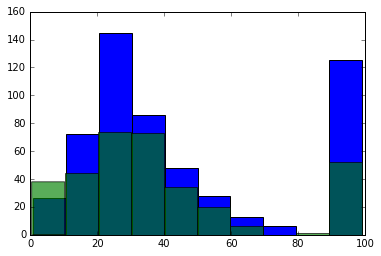

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

train['Age'] = train['Age'].fillna(99)
plt.hist(train['Age'][train['Survived'] == 0]) #, train['Survived'])
plt.hist(train['Age'][train['Survived'] == 1], alpha=0.65) #, train['Survived'])

Well, I need a better approach to this, but it seems that under 10, most kids survive.

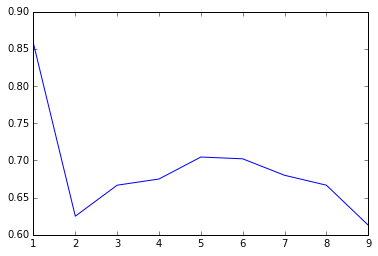

In [16]:
survival_per_age = []
for age in range(1,10):
    survival_per_age.append(train['Survived'][train['Age'] <= age].value_counts(normalize=True)[1])

plt.plot(range(1,10), survival_per_age)

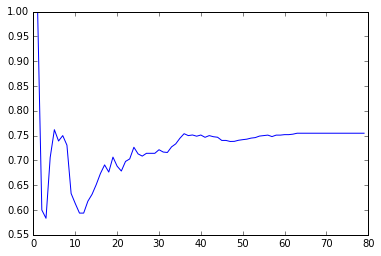

In [17]:
survival_per_age_female = []
for age in range(1,80):
    survival_per_age_female.append(train['Survived'][(train['Sex'] == 'female') & (train['Age'] <= age)].value_counts(normalize=True)[1])

plt.plot(range(1,80), survival_per_age_female)

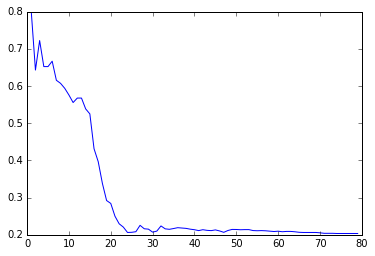

In [18]:
survival_per_age_male = []
for age in range(1,80):
    survival_per_age_male.append(train['Survived'][(train['Sex'] == 'male') & (train['Age'] <= age)].value_counts(normalize=True)[1])

plt.plot(range(1,80), survival_per_age_male)

From a simple inspection, it is clear that sex and age are highly important (we can check that later on but I'm still learning about stuff such as p-values and similar, so let's just try to use this so that for ages up to (and including) 11, we also predict survival.

A better option would be testing different ages, but we are currently just doing some pure data analysis (no machine learning whatsoever), so let's stick to this thumb-in-the-air approach.

In [19]:
children_first = train['Age'] <= 11
len(train[train['Survived'] == children_first]) / len(train)

0.6273849607182941

In [20]:
women_and_children_first = (train['Age'] <= 11) | (train['Sex'] == 'female')
len(train[train['Survived'] == women_and_children_first]) / len(train)

0.7912457912457912

In [21]:
# And we can see that we get a result slightly better than with just the sex, so let's use it
csv_from_prediction((test['Age'] <= 11) | (test['Sex'] == 'female'))

Those passenger class affect survival? My assumption is that different services and probably even different mentality/attitude towards disaster would have an influence.

(array([ 136.,    0.,    0.,    0.,    0.,   87.,    0.,    0.,    0.,  119.]),
 array([ 1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ]),
 <a list of 10 Patch objects>)

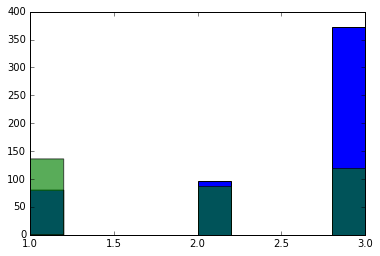

In [22]:
plt.hist(train['Pclass'][train['Survived'] == 0]) #, train['Survived'])
plt.hist(train['Pclass'][train['Survived'] == 1], alpha=0.65) #, train['Survived'])

In [23]:
train['Pclass'][train['Survived'] == 1].value_counts() / train['Pclass'][train['Survived'] == 0].value_counts()

1    1.700000
2    0.896907
3    0.319892
Name: Pclass, dtype: float64

In [24]:
rich_first = (train['Pclass'] == 1 )
len(train[train['Survived'] == rich_first]) / len(train)

0.6790123456790124

As we can see, passengers in class 1 and 2 have higher chances of survival (with the training set). Let's compose this with our previous best approach:

In [25]:
women_children_rich_first = (train['Age'] <= 11) | (train['Sex'] == 'female') | (train['Pclass'].isin([1]))
len(train[train['Survived'] == women_children_rich_first]) / len(train)

0.7519640852974186

The result is worse. Why? My interpretation is that the accuracy based just on Pclass is not better than the 'Women and children first' criteria. Therefore it adds false positives. It also means that (at least at that time) money wasn't the most important thing to survive in a catastrophe, or the crew made sure it happened that way.

**Let's start a new notebook**

We will copy some bits from here (the most useful such as some functions).

In [45]:
train[(train['Parch'] > 0) & (train['Age'] <=11) & (train['Survived'] == 1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C
58,59,1,2,"West, Miss. Constance Mirium",female,5.00,1,2,C.A. 34651,27.7500,NaN,S
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.00,0,2,363291,20.5250,NaN,S
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,NaN,S
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S
184,185,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.00,0,2,315153,22.0250,NaN,S
193,194,1,2,"Navratil, Master. Michel M",male,3.00,1,1,230080,26.0000,F2,S
233,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.00,4,2,347077,31.3875,NaN,S


In [51]:
train['Ticket'].value_counts()

1601                7
CA. 2343            7
347082              7
3101295             6
CA 2144             6
347088              6
S.O.C. 14879        5
382652              5
2666                4
113781              4
LINE                4
W./C. 6608          4
347077              4
113760              4
349909              4
PC 17757            4
17421               4
4133                4
19950               4
C.A. 31921          3
24160               3
230080              3
F.C.C. 13529        3
PC 17582            3
C.A. 34651          3
239853              3
110152              3
35273               3
PC 17755            3
SC/Paris 2123       3
                   ..
244278              1
350036              1
315084              1
A/5 21171           1
347081              1
SC/PARIS 2167       1
STON/O2. 3101282    1
219533              1
SC/AH 29037         1
330958              1
347063              1
315098              1
A/5 21174           1
SOTON/OQ 392086     1
347089    

In [57]:
train[train['Ticket'] == '330958']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.8792,NaN,Q


In [58]:
ticket_groups = train['Ticket'].value_counts()

In [85]:
train['PeopleInGroup'] = train['Ticket'].map(lambda x: ticket_groups[x])

range(1, 7)

In [95]:
for i in range(ticket_groups.min(), ticket_groups.max()):
    print(train[(train['PeopleInGroup'] == i) & (train['Sex'] == 'female')]['Survived'].value_counts(normalize=True))
print('-----')
for i in range(ticket_groups.min(), ticket_groups.max()):
    print(train[(train['PeopleInGroup'] == i) & (train['Age'] <= 11)]['Survived'].value_counts(normalize=True))

1    0.746269
0    0.253731
Name: Survived, dtype: float64
1    0.813725
0    0.186275
Name: Survived, dtype: float64
1    0.944444
0    0.055556
Name: Survived, dtype: float64
1    0.592593
0    0.407407
Name: Survived, dtype: float64
0    1.0
Name: Survived, dtype: float64
0    1.0
Name: Survived, dtype: float64
-----
1    1.0
Name: Survived, dtype: float64
1    0.823529
0    0.176471
Name: Survived, dtype: float64
1    0.923077
0    0.076923
Name: Survived, dtype: float64
1    0.538462
0    0.461538
Name: Survived, dtype: float64
0    1.0
Name: Survived, dtype: float64
0    1.0
Name: Survived, dtype: float64
